# Pandas Library

#### Note:
Kindly go through **Numpy Tutorial** before this.

## Introduction:

Understanding the format of data and what the data looks like is one of the most important aspects of data-analysis.

Knowing what we are dealing with largely helps us in finding out the key points in the data.

In this notebook we shall discuss a few ways we can analyse the dataset using **Pandas** library.

To know more about Pandas, visit:
[What kind of data does Pandas handle?](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/01_table_oriented.html)

The best way to learn the implementations is to start with examples

## Example dataset:

Let us see how powerful python can be in displaying the dataset in a friendly manner.

We shall start the code by importing few libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Note:
We will be building on the information given in the **IAPT Tutorial 1.pynb** file. (Also I highly recommend Reading numpy tutorial before this.)

 **Example 1**
 
We will make a table of 8 students with their respective grades and attendance:

In [2]:
grades = ['A', 'B', 'C', 'D']
attendance = [96.0, 73.9, 89.8, 80.9]
names = ['Arthur Morgan', 'Dutch Vander Linde', 'Sadie Adler', 'John Marston']

In [3]:
# Shuffling the grades:
np.random.shuffle(grades)

The next thing is to create a dataframe (df) that stores all the information together as a table.

Making a Student's profile dataframe:

In [4]:
profile_df = pd.DataFrame({'Names':names, 'Grades':grades,'Attendance (%)':attendance})
profile_df

,Names,Grades,Attendance (%)
0,Arthur Morgan,A,96.0
1,Dutch Vander Linde,C,73.9
2,Sadie Adler,D,89.8
3,John Marston,B,80.9


In order to get a short and condensed information about this data, we can use `df.info()`.

In [5]:
profile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Names           4 non-null      object 
 1   Grades          4 non-null      object 
 2   Attendance (%)  4 non-null      float64
dtypes: float64(1), object(2)
memory usage: 224.0+ bytes


The above table displays the **name** of all the columns and their respective **data type**. 

| Data Type | Meaning |
|:---:|:---:|
|object|Data is string type.|
|float64| Data is a floating number (of *64* bits)

The table also displays the number of null values in the data. This is particularly useful when we are dealing with incomplete datasets.

- Getting the names of the students:

In [6]:
profile_df['Names']

0         Arthur Morgan
1    Dutch Vander Linde
2           Sadie Adler
3          John Marston
Name: Names, dtype: object

- Searching for information on one particular student

In [7]:
#Locating the information on 'John Marston'
profile_df[profile_df['Names']=='John Marston']

,Names,Grades,Attendance (%)
3,John Marston,B,80.9


In [8]:
profile_df

,Names,Grades,Attendance (%)
0,Arthur Morgan,A,96.0
1,Dutch Vander Linde,C,73.9
2,Sadie Adler,D,89.8
3,John Marston,B,80.9


### Adding a new column:

Adding a column in Pandas DF is simple:

In [9]:
# Adding the Gender column:
profile_df['Gender'] = ['Male','Male','Female','Male']
profile_df

,Names,Grades,Attendance (%),Gender
0,Arthur Morgan,A,96.0,Male
1,Dutch Vander Linde,C,73.9,Male
2,Sadie Adler,D,89.8,Female
3,John Marston,B,80.9,Male


If you wish to add a new name in the dataframe:<br> Suppose we want to add the name '*Abigail Roberts*' with '*90%*' attendance and '*B*' grade.

In [10]:
new_entry = pd.DataFrame({'Names': ['Abigail Roberts'], 'Grades': ['B'], 'Attendance (%)': [90.0], 'Gender':['Female']})

profile_df = profile_df.append(new_entry, ignore_index=True)
profile_df

,Names,Grades,Attendance (%),Gender
0,Arthur Morgan,A,96.0,Male
1,Dutch Vander Linde,C,73.9,Male
2,Sadie Adler,D,89.8,Female
3,John Marston,B,80.9,Male
4,Abigail Roberts,B,90.0,Female


It is advisable to create a function which adds a new entry in the dataset.

In [11]:
def add_entry(df, Name:'str', Grade : 'str', Attendance : 'float', Gender: 'str'):
    new_entry = pd.DataFrame({'Names': [Name], 'Grades': [Grade], 'Attendance (%)': [Attendance], 'Gender':[Gender]})
    df = df.append(new_entry, ignore_index=True)
    return df

In [12]:
profile_df = add_entry(profile_df, 'Ellen', 'A', 33.3, "Female")

In [13]:
profile_df

,Names,Grades,Attendance (%),Gender
0,Arthur Morgan,A,96.0,Male
1,Dutch Vander Linde,C,73.9,Male
2,Sadie Adler,D,89.8,Female
3,John Marston,B,80.9,Male
4,Abigail Roberts,B,90.0,Female
5,Ellen,A,33.3,Female


### Dropping a row entry:

Removing the latest entry from the DataFrame.

In [14]:
profile_df = profile_df.drop(5) #type the index number for the respective name.
profile_df

,Names,Grades,Attendance (%),Gender
0,Arthur Morgan,A,96.0,Male
1,Dutch Vander Linde,C,73.9,Male
2,Sadie Adler,D,89.8,Female
3,John Marston,B,80.9,Male
4,Abigail Roberts,B,90.0,Female


### Dropping columns:

Removing the Gender column:

The `drop(axis= 0,1)` argument represents searching in rows, columns respectively.

In [15]:
profile_df.drop(['Gender'], axis =1) #axis = 1 implies we search for 'Gender' in columns.

,Names,Grades,Attendance (%)
0,Arthur Morgan,A,96.0
1,Dutch Vander Linde,C,73.9
2,Sadie Adler,D,89.8
3,John Marston,B,80.9
4,Abigail Roberts,B,90.0


# Realistic Example:

This dataset will be provided to you before this tutorial.

We will use **pandas** for viewing the data in a tabular format.

In order to read the `.csv` file, we need to call the `.read_csv` method from the *pandas* library.

In [18]:
# Writing the location of the file:
path = 'C:/Users/astro/Documents/IAPT Course/Datasets folder/housing.csv'

In [19]:
df = pd.read_csv(path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The data can be wearisome to look at. But pandas has a few tricks up its sleeve.<br> For a Brief information on the dataframe use `df.info()`:

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The above information shows the names of each column and their respective **Data type** (*DType*).
- If Dtype = `object` its a **string**
- If Dtype = `float64` its a **floating number** (64 bit).
- Similarly for `int`, `Boolean`, etc.

The table also shows the **count of Null** values. This is particularly important if you are concerned with incomplete dataset. In our case we do have few null values which we will look into later.

There are **20,640** instances in the dataset, it is perfect to get started. Notice that the `total_bedrooms` attribute (a.k.a column data) has only 20,433 non-null values, meaning that 207 districts are missing this feature. We will take care of this later.<br> All attributes are numerical except the `ocean_proximity` field. It's type is object so it could hold any type of Python Object. But since this DF is loaded loaded from a CSV file, we know that it must be a text (string) attribute. 

If you want to know the categories in ocean proximity then use the `value_counts()` method:

In [21]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Let's look at other fields. The `describe()` method shows a summary of the numerical attributes:

In [22]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The count, mean, min and max rows are self-explanatory. Note that the null values are ignored (so, for example, the count of total_bedrooms is 20,433, not 20,640). <br> The `std` row shows the *standard deviation*, which measures how dispersed the values are.<br> The `25%`, `50%`, `75%` rows show the corresponding **percentiles**: a percentile indicated the value below which a given percentage of observations in a group of observations fall. For example, 25% of the districts have a `housing_median_age` lower than 18, while 50% are lower than 29 and 75% are lower than 37. **These are called the 25th percentile (or first *quartile*), the median, and the 75th percentile (or third quartile)**.


One more way to get a feel of the data we are dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given range (on the horizontal axis). You can either plot this one attribute at a time, or you can call the `hist()` method on the whole dataset as shown below. This will plot a histogram for each numerical attribute.

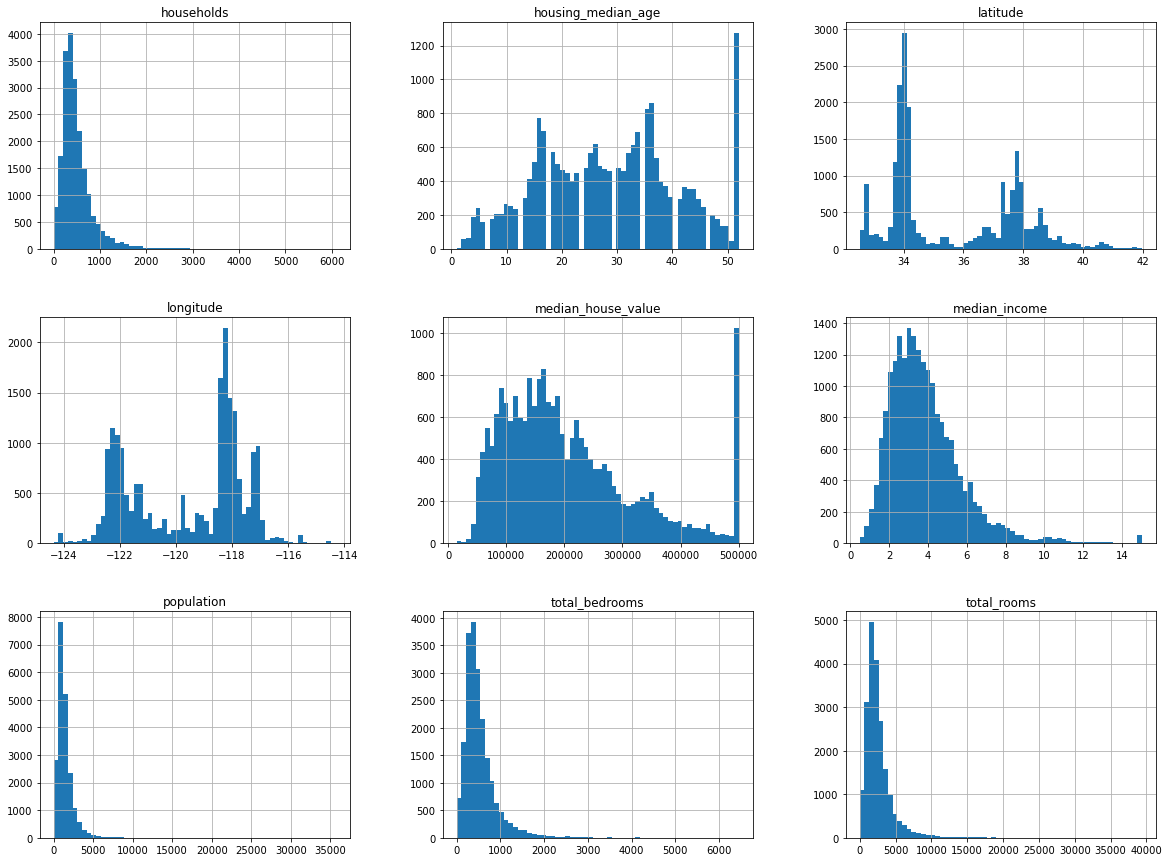

In [23]:
df.hist(bins=60,figsize=(20,15))
plt.show()

In the above code `bins = 60` implies that the data can be split into 60 different bars.

For example, if the **bins are more**, you would expect a more precise data graph:

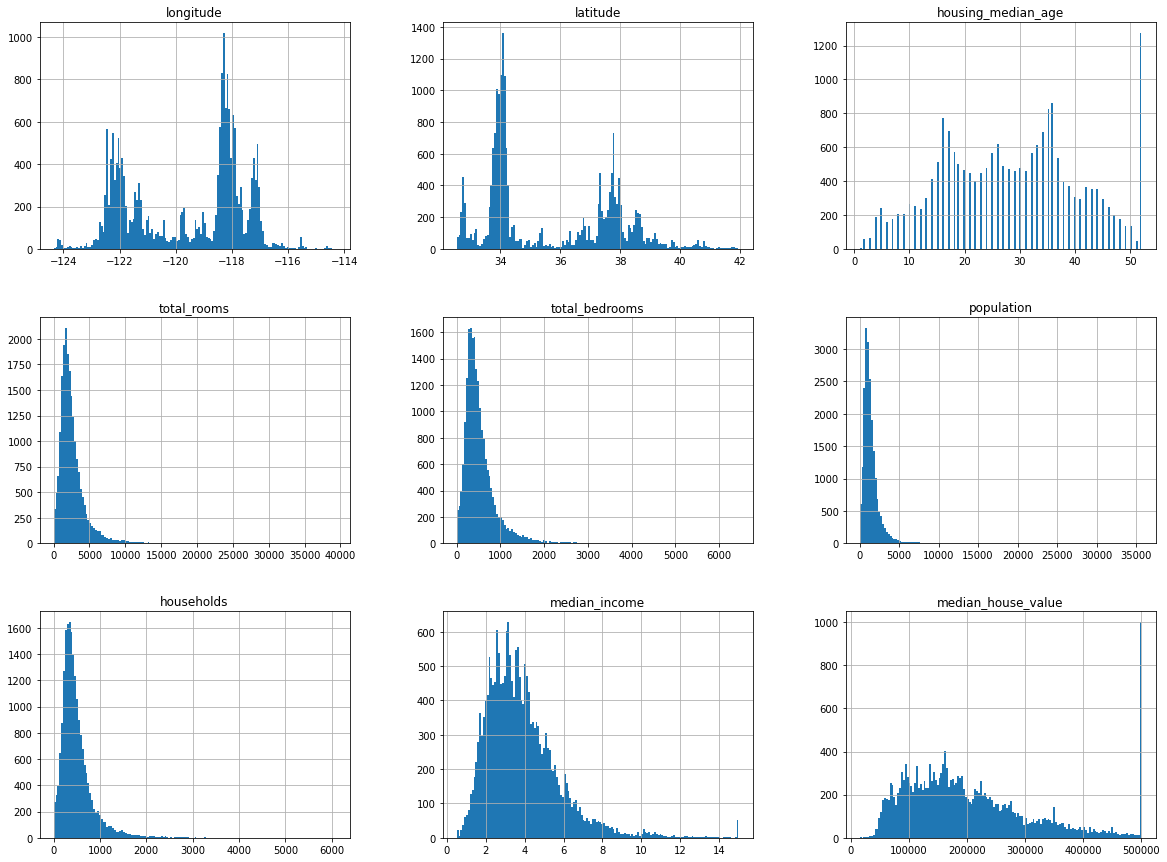

In [ ]:
df.hist(bins=150,figsize=(20,15))
plt.show()

#### Visualizing Geographical Data:

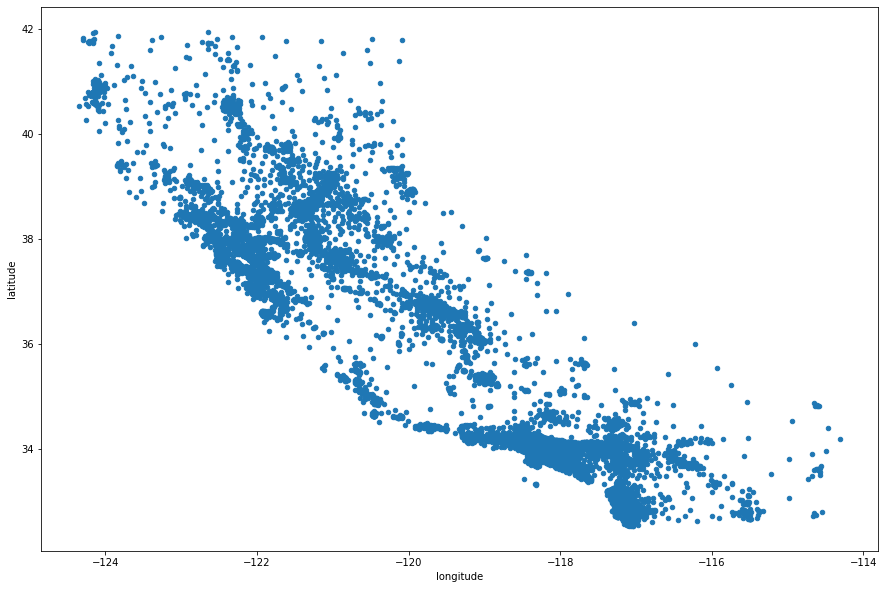

In [ ]:
df.plot(kind='scatter', x='longitude', y = 'latitude', figsize=(15,10))

This looks like California all right, but other than that it is hard to see any particular pattern. Setting `alpha=0.1` makes it much easier to visualize the places where there is a high density of data points:

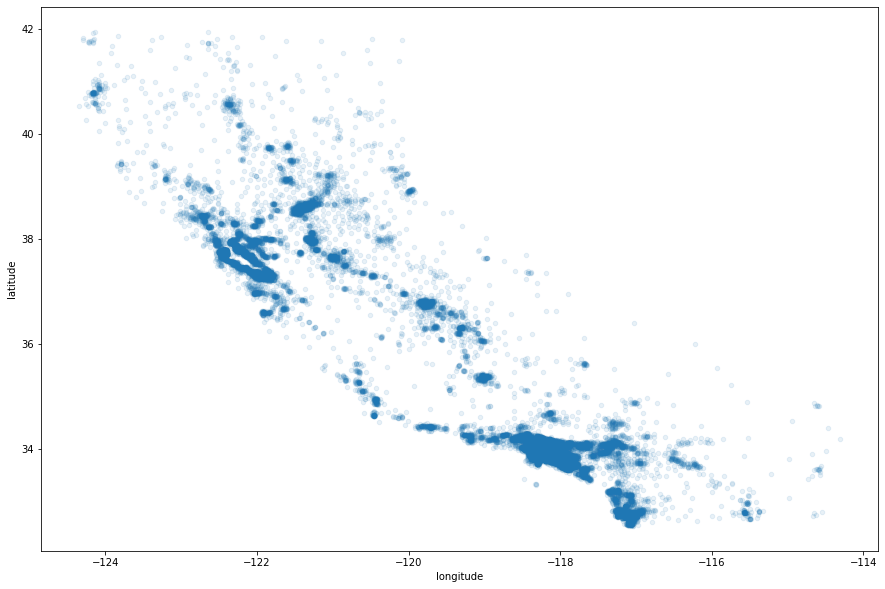

In [ ]:
df.plot(kind='scatter', x='longitude', y = 'latitude', figsize=(15,10), alpha=0.1)

We can clearly see the high density areas, namely the Bay Area and around Los Angeles and San Diego, plus a long line of fairly high density in the Central Valley, in particular Sacramento and Fresno.

Now let us look at the housing prices. The radius of each circle represents the district's population (option `s`), and the color represents the price (option `c`). We will use predefined color map (option `cmap`) called '`jet`', which ranges from blue (low values) to red (high values).

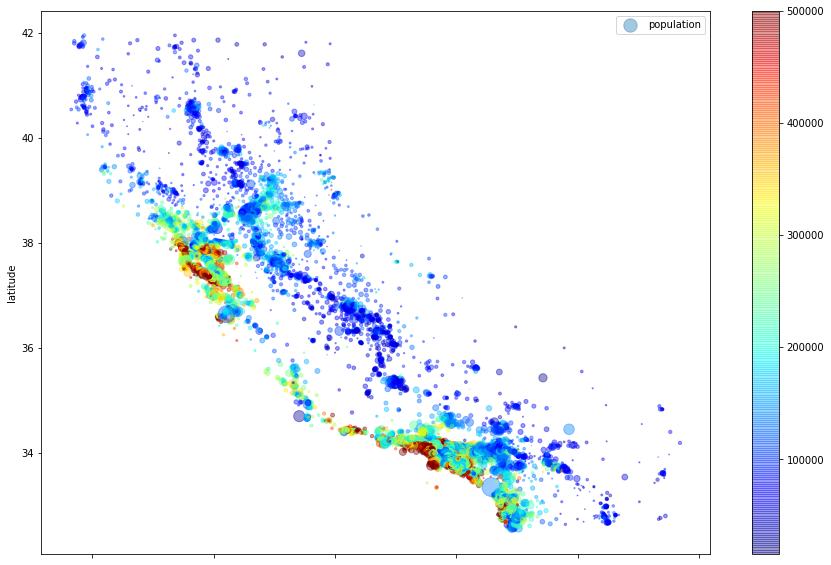

In [ ]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=df['population']/100, label='population', figsize=(15,10), c=df['median_house_value'], cmap=plt.get_cmap('jet'), colorbar = True)
plt.show()

### Looking for Correlations:
One can compute the standard correlation coefficients (also called *Pearson's **r**.*) between every pair of the attributes using the `corr()` method:

In [ ]:
corr_matrix = df.corr()

Now let's look at how much each attribute correlates with the `median house value`:

In [ ]:
corr_matrix['median_house_value'].sort_values()

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

The correlation coefficient ranges from -1 to 1. 

When it is close to 1, it means that there is a strong positive correlation; for example, the *median house value* tends to go up when the *median income* goes up. 

Coefficients close to 0 mean that there is no linear correlation between them.

## Removing Null values:


In order to remove the null values use: `df.dropna()` function:

This will eliminate all rows which have null values in them.

For more information about this function you can refer here

In [25]:
clean_df = df.dropna().info()
print(clean_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB
None
